In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

# warning control
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load datasets
outage_df= pd.read_csv("kplc_daily_schedule.csv")
weather_df= pd.read_csv("nairobi_weather_2007_2008.csv")
power_df= pd.read_csv("power_multi_household_daily.csv")
consumption_df=pd.read_csv("lead1.0-small.csv")

In [3]:
# Ensure proper date formats, no missing values, and consistency in meter IDs and timestamps.
print("=== Outage Data ===")
print(outage_df.head(), "\n")

print("=== Weather Data ===")
print(weather_df.head(), "\n")

print("=== Power Data ===")
print(power_df.head(), "\n")

print("=== Consumption Data ===")
print(consumption_df.head())

=== Outage Data ===
         date  scheduled_outage_today  n_scheduled_events  \
0  2026-01-18                       1                   3   
1  2026-01-20                       1                   4   
2  2026-01-21                       1                   2   
3  2026-01-22                       1                   3   
4  2026-01-23                       1                   1   

   total_scheduled_minutes  
0                   1380.0  
1                   1950.0  
2                    960.0  
3                   1380.0  
4                    450.0   

=== Weather Data ===
         date  tmax  tmin  prcp  wspd_max
0  2007-01-01  24.7  13.1   1.0      17.6
1  2007-01-02  23.2  13.7   0.1      17.4
2  2007-01-03  22.6  14.8   0.9      20.0
3  2007-01-04  21.5  14.9   2.3      21.4
4  2007-01-05  23.3  12.9   0.0      18.5 

=== Power Data ===
  meter_id        date  daily_mean_power  daily_std_power  daily_min_power  \
0  MTR_001  2006-12-16          2.617495         0.882098        

In [4]:
#convert timestamp to date
consumption_df = consumption_df.rename(columns={"timestamp": "date"})

In [5]:
#convert date to the same datatype
outage_df["date"] = pd.to_datetime(outage_df["date"])
weather_df["date"] = pd.to_datetime(weather_df["date"])
power_df["date"] = pd.to_datetime(power_df["date"])
consumption_df["date"] = pd.to_datetime(consumption_df["date"])                                                                           

### Inspect the data


In [7]:
#Dataset shape
print("Outage shape:", outage_df.shape)
print("Weather shape:", weather_df.shape)
print("Power shape:", power_df.shape)
print("Consumption shape:", consumption_df.shape)


Outage shape: (5, 4)
Weather shape: (731, 5)
Power shape: (14420, 9)
Consumption shape: (1749494, 4)


In [8]:
# Check for missing values
print("=== Outage Data ===")
print("Missing values per column:\n", outage_df.isna().sum(), "\n")

print("=== Weather Data ===")
print("Missing values per column:\n", weather_df.isna().sum(), "\n")

print("=== Power Data ===")
print("Missing values per column:\n", power_df.isna().sum(), "\n")

print("=== Consumption Data ===")
print("Missing values per column:\n", consumption_df.isna().sum(), "\n")



=== Outage Data ===
Missing values per column:
 date                       0
scheduled_outage_today     0
n_scheduled_events         0
total_scheduled_minutes    0
dtype: int64 

=== Weather Data ===
Missing values per column:
 date        0
tmax        0
tmin        0
prcp        0
wspd_max    0
dtype: int64 

=== Power Data ===
Missing values per column:
 meter_id             0
date                 0
daily_mean_power    90
daily_std_power     90
daily_min_power     90
daily_max_power     90
voltage_mean        90
voltage_std         90
intensity_mean      90
dtype: int64 

=== Consumption Data ===
Missing values per column:
 building_id           0
date                  0
meter_reading    107653
anomaly               0
dtype: int64 



In [12]:
#Check for duplicates
Outage_duplicates = outage_df.duplicated()
print("Outage Dataset number of duplicates:", Outage_duplicates.sum(), "\n")

Weather_duplicates = weather_df.duplicated()
print("Weather Dataset number of duplicates:", Weather_duplicates.sum(), "\n")

Power_duplicates = power_df.duplicated()
print("Power Dataset number of duplicates:", Power_duplicates.sum(), "\n")

Consumption_duplicates = consumption_df.duplicated()
print("Consumption Dataset number of duplicates:", Consumption_duplicates.sum(), "\n")



Outage Dataset number of duplicates: 0 

Weather Dataset number of duplicates: 0 

Power Dataset number of duplicates: 0 

Consumption Dataset number of duplicates: 0 



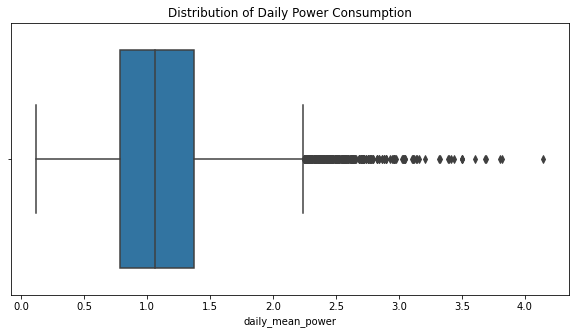

In [10]:
#Check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(x='daily_mean_power', data=power_df)
plt.title("Distribution of Daily Power Consumption")
plt.show()

In [11]:
#Remove outliers
upper_limit = power_df['daily_mean_power'].quantile(0.99)
power_df = power_df[power_df['daily_mean_power'] <= upper_limit]

print("After outlier removal, dataset shape:", power_df.shape)

After outlier removal, dataset shape: (14186, 9)


#### Electricity consumption data